In [ ]:
!pip install kaggle


!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

!unzip diabetic-retinopathy-224x224-gaussian-filtered.zip


import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the dataset
data_dir = '/content/gaussian_filtered_images'
# You can also use the path variable from the kagglehub import
# (if that library works correctly in your environment).
# path = kagglehub.dataset_download("sovitrath/diabetic-retinopathy-224x224-gaussian-filtered")
# data_dir = path

# Show some example images
image_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]

for i, image_file in enumerate(image_files[:5]):  # Display only the first 5 images
    img_path = os.path.join(data_dir, image_file)
    try:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error opening {image_file}: {e}")

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0
 98% 420M/427M [00:04<00:00, 103MB/s] 
100% 427M/427M [00:04<00:00, 109MB/s]
Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussi

In [ ]:
!pip install pandas scikit-learn torch torchvision matplotlib Pillow

Displaying examples for: 0 - No_DR


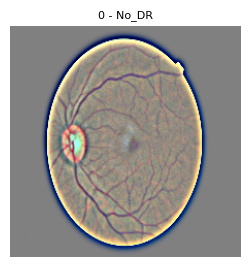

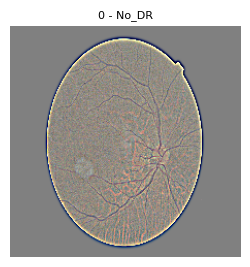

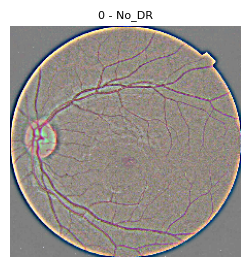

Displaying examples for: 1 - Mild


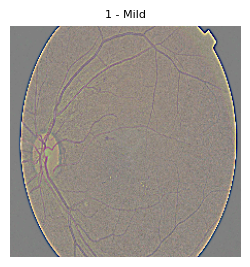

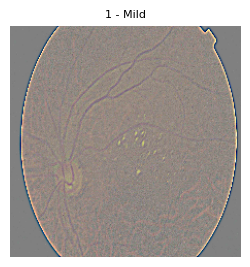

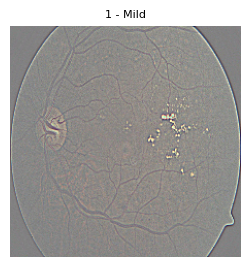

Displaying examples for: 2 - Moderate


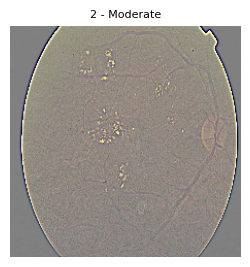

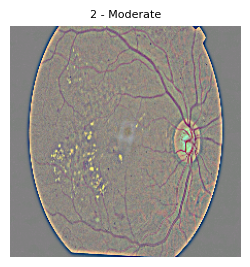

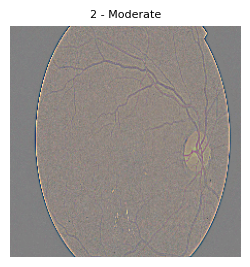

Displaying examples for: 3 - Severe


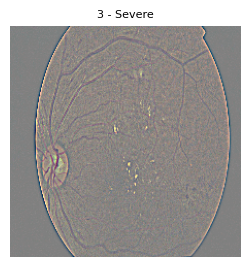

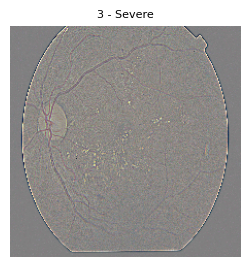

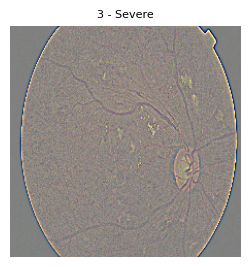

Displaying examples for: 4 - Proliferate_DR


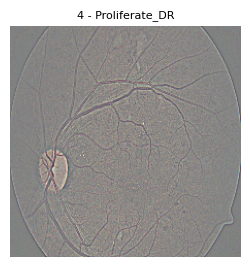

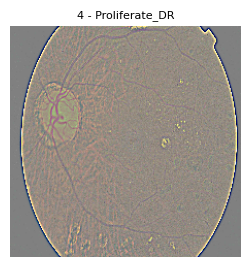

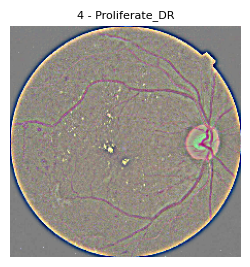

In [ ]:

base_dir = '/content/gaussian_filtered_images/gaussian_filtered_images'

categories = {
    "0 - No_DR": "No_DR",
    "1 - Mild": "Mild",
    "2 - Moderate": "Moderate",
    "3 - Severe": "Severe",
    "4 - Proliferate_DR": "Proliferate_DR"
}

for label, folder in categories.items():
    folder_path = os.path.join(base_dir, folder)
    if os.path.exists(folder_path):
        image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        print(f"Displaying examples for: {label}")
        for img_path in image_files[:3]:
            try:
                img = Image.open(img_path).convert("RGB")
                plt.figure(figsize=(3, 3))
                plt.imshow(img)
                plt.title(label, fontsize=8)
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Error opening {img_path}: {e}")
    else:
        print(f"Folder not found for category: {label}")

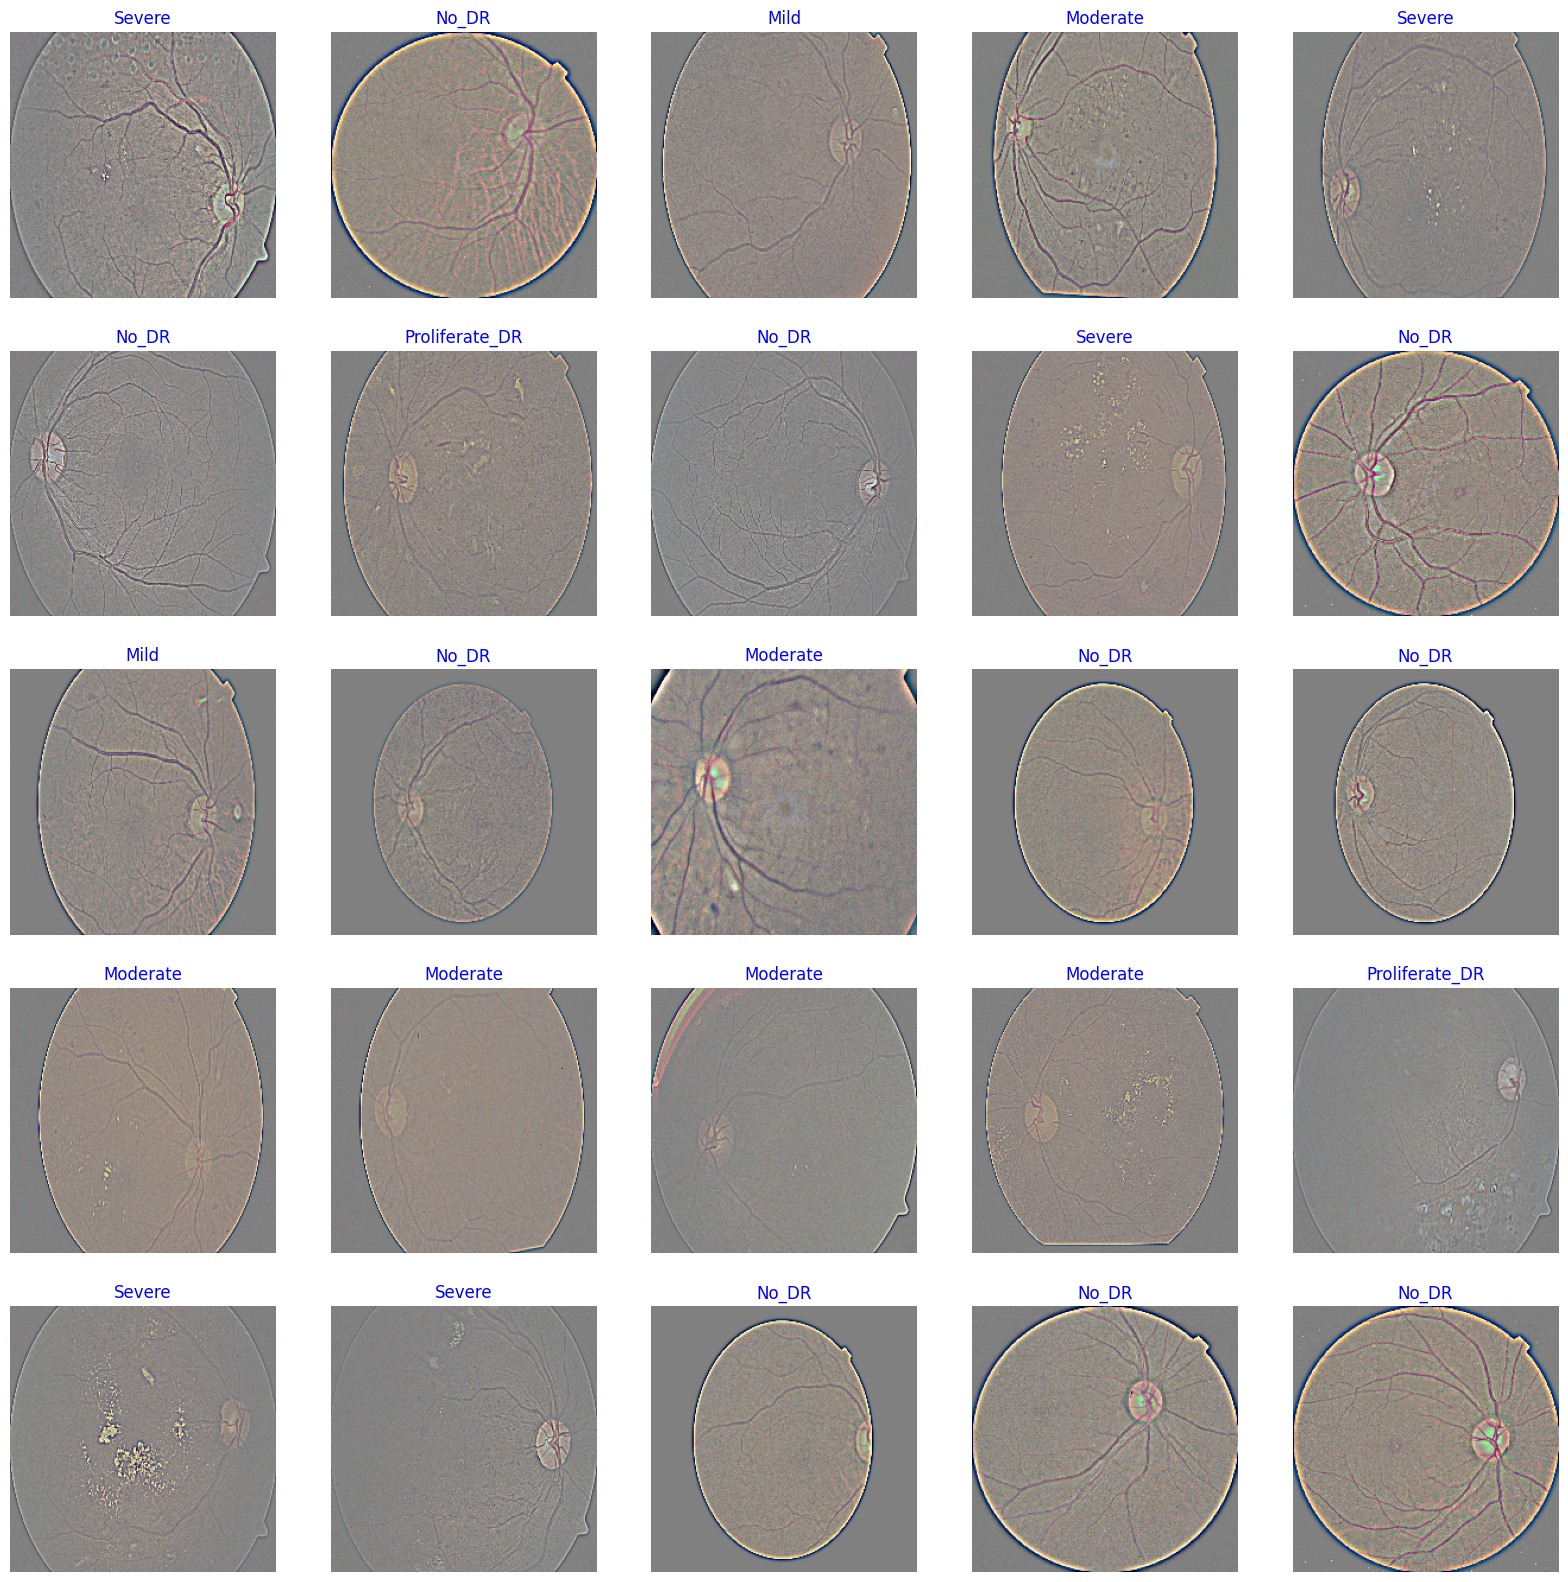

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = {
    "0 - No_DR": "No_DR",
    "1 - Mild": "Mild",
    "2 - Moderate": "Moderate",
    "3 - Severe": "Severe",
    "4 - Proliferate_DR": "Proliferate_DR"
}

base_dir = '/content/gaussian_filtered_images/gaussian_filtered_images'

# Custom Dataset class to load images from directories
class RetinopathyDataset(Dataset):
    def __init__(self, base_dir, categories):
        self.base_dir = base_dir
        self.categories = categories
        self.image_paths = []
        self.labels = []

        # Collect image paths and labels
        for label, folder in categories.items():
            folder_path = os.path.join(base_dir, folder)
            if os.path.exists(folder_path):
                image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
                self.image_paths.extend(image_files)
                self.labels.extend([label] * len(image_files))  # Assign the same label for each image in the folder

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open the image
        image = Image.open(image_path).convert("RGB")
        image = np.array(image)

        # Convert the label to a numerical index
        label_idx = list(self.categories.keys()).index(label)

        return torch.tensor(image).permute(2, 0, 1), torch.tensor(label_idx)

# Create a DataLoader
dataset = RetinopathyDataset(base_dir, categories)
train_loader = DataLoader(dataset, batch_size=25, shuffle=True)

# Function to plot a batch of images
def plot_batch_images(data_loader, class_names, num_images=25):
    images, labels = next(iter(data_loader))
    sample = min(len(images), num_images)

    plt.figure(figsize=(20, 20))
    for i in range(sample):
        plt.subplot(5, 5, i + 1)

        # Convert the tensor to a NumPy array and transpose the image dimensions (C, H, W) -> (H, W, C)
        image = images[i].cpu().numpy().transpose((1, 2, 0))

        # If the images are in the range [0, 255], convert them to uint8
        image = np.clip(image, 0, 255).astype(np.uint8)

        plt.imshow(image)

        # Get the label and corresponding class name
        index = labels[i].item()
        class_name = class_names[index]

        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')

    plt.show()

# Example usage:
class_names = list(categories.values())  # The class names for the labels
plot_batch_images(train_loader, class_names)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 55.9MB/s]


Epoch 1/10 - Train Accuracy: 72.99%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 - Test Accuracy: 0.68%
Epoch 1/10 - Test Precision: 0.70
Epoch 1/10 - Test Recall: 0.68
Epoch 1/10 - Test F1 Score: 0.64

Epoch 2/10 - Train Accuracy: 76.41%
Epoch 2/10 - Test Accuracy: 0.73%
Epoch 2/10 - Test Precision: 0.76
Epoch 2/10 - Test Recall: 0.73
Epoch 2/10 - Test F1 Score: 0.70

Epoch 3/10 - Train Accuracy: 79.11%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/10 - Test Accuracy: 0.69%
Epoch 3/10 - Test Precision: 0.68
Epoch 3/10 - Test Recall: 0.69
Epoch 3/10 - Test F1 Score: 0.65

Epoch 4/10 - Train Accuracy: 82.04%
Epoch 4/10 - Test Accuracy: 0.76%
Epoch 4/10 - Test Precision: 0.76
Epoch 4/10 - Test Recall: 0.76
Epoch 4/10 - Test F1 Score: 0.74

Epoch 5/10 - Train Accuracy: 83.20%
Epoch 5/10 - Test Accuracy: 0.81%
Epoch 5/10 - Test Precision: 0.79
Epoch 5/10 - Test Recall: 0.81
Epoch 5/10 - Test F1 Score: 0.79

Epoch 6/10 - Train Accuracy: 86.04%
Epoch 6/10 - Test Accuracy: 0.80%
Epoch 6/10 - Test Precision: 0.79
Epoch 6/10 - Test Recall: 0.80
Epoch 6/10 - Test F1 Score: 0.79

Epoch 7/10 - Train Accuracy: 89.42%
Epoch 7/10 - Test Accuracy: 0.78%
Epoch 7/10 - Test Precision: 0.79
Epoch 7/10 - Test Recall: 0.78
Epoch 7/10 - Test F1 Score: 0.77

Epoch 8/10 - Train Accuracy: 91.74%
Epoch 8/10 - Test Accuracy: 0.72%
Epoch 8/10 - Test Precision: 0.77
Epoch 8/10 - Test Recall: 0.72
Epoch 8/10 - Test F1 Score: 0.72

Epoch 9/10 - Train Acc

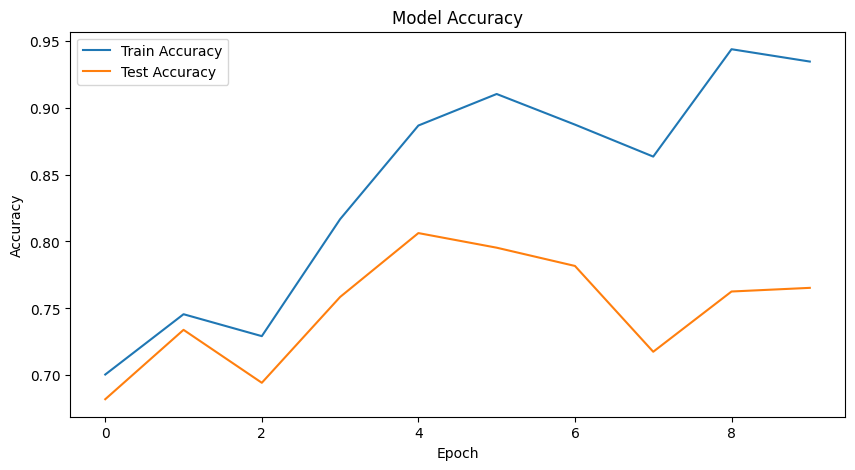

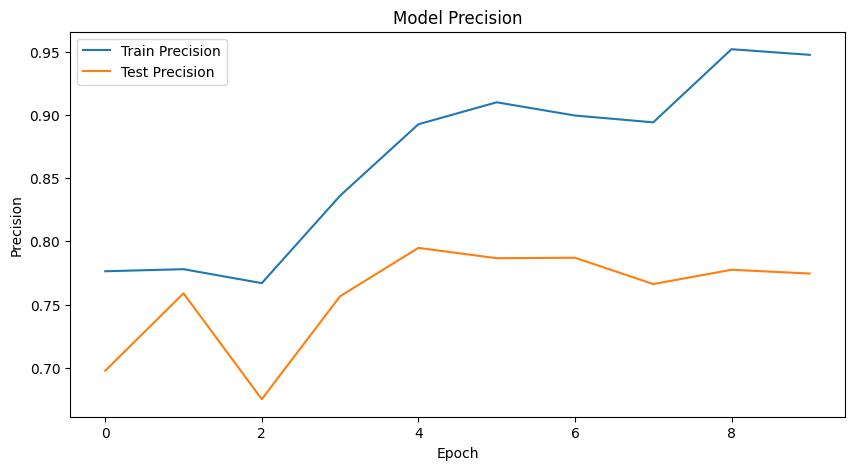

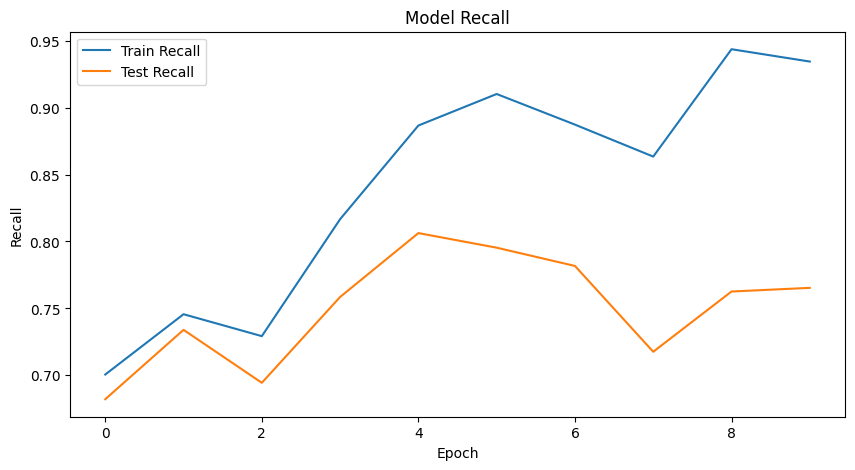

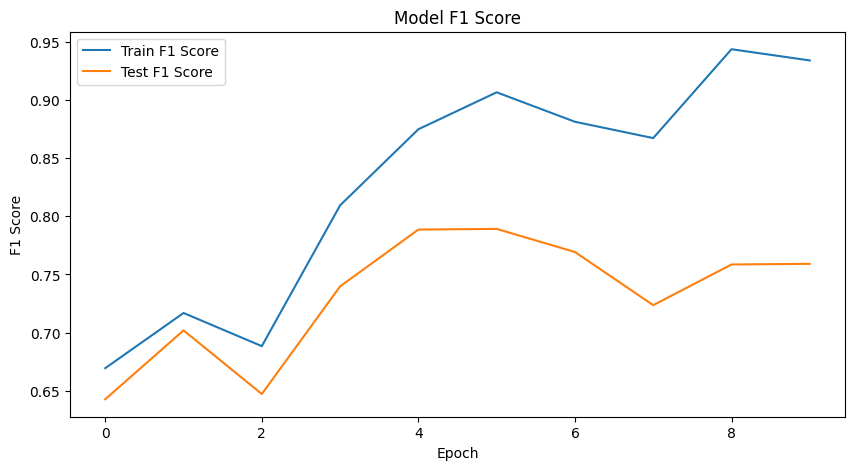

In [ ]:
import os
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from PIL import Image

# Define the dataset class
class RetinopathyDataset(Dataset):
    def __init__(self, root_dir, categories, transform=None):
        self.root_dir = root_dir
        self.categories = categories
        self.transform = transform
        self.image_paths = []
        self.labels = []
        for folder_name, label in categories.items():
            folder_path = os.path.join(self.root_dir, folder_name.split(' - ')[-1])
            if os.path.exists(folder_path):
                for img_name in os.listdir(folder_path):
                    if img_name.endswith(('.png', '.jpg', '.jpeg')):
                        self.image_paths.append(os.path.join(folder_path, img_name))
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Set base directory and categories
base_dir = '/content/gaussian_filtered_images/gaussian_filtered_images'
categories = {
    "0 - No_DR": 0,
    "1 - Mild": 1,
    "2 - Moderate": 2,
    "3 - Severe": 3,
    "4 - Proliferate_DR": 4
}

# Create the dataset and dataloaders
dataset = RetinopathyDataset(base_dir, categories, transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the baseline model (ResNet18)
baseline_model = models.resnet18(weights='IMAGENET1K_V1')
baseline_model.fc = nn.Linear(baseline_model.fc.in_features, len(categories))
baseline_model = baseline_model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001)

# Function to evaluate model performance
def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return accuracy, precision, recall, f1

# Function to train the model
def train_model(model, train_loader, test_loader, num_epochs):
    train_metrics = []
    test_metrics = []

    for epoch in range(num_epochs):
        model.train()
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        # Calculate accuracy
        train_accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}/{num_epochs} - Train Accuracy: {train_accuracy:.2f}%')

        # Evaluate on train and test set
        train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(model, train_loader)
        test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(model, test_loader)

        # Store metrics for visualization
        train_metrics.append((train_accuracy, train_precision, train_recall, train_f1))
        test_metrics.append((test_accuracy, test_precision, test_recall, test_f1))

        # Print test accuracy and other metrics
        print(f'Epoch {epoch+1}/{num_epochs} - Test Accuracy: {test_accuracy:.2f}%')
        print(f'Epoch {epoch+1}/{num_epochs} - Test Precision: {test_precision:.2f}')
        print(f'Epoch {epoch+1}/{num_epochs} - Test Recall: {test_recall:.2f}')
        print(f'Epoch {epoch+1}/{num_epochs} - Test F1 Score: {test_f1:.2f}\n')

    return train_metrics, test_metrics

# Train the model
train_metrics, test_metrics = train_model(baseline_model, train_loader, test_loader, num_epochs=10)

# Plot Accuracy, Precision, Recall, and F1-Score
train_acc, train_prec, train_rec, train_f1 = zip(*train_metrics)
test_acc, test_prec, test_rec, test_f1 = zip(*test_metrics)

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Precision Plot
plt.figure(figsize=(10, 5))
plt.plot(train_prec, label='Train Precision')
plt.plot(test_prec, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Model Precision')

# Recall Plot
plt.figure(figsize=(10, 5))
plt.plot(train_rec, label='Train Recall')
plt.plot(test_rec, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Model Recall')

# F1 Score Plot
plt.figure(figsize=(10, 5))
plt.plot(train_f1, label='Train F1 Score')
plt.plot(test_f1, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.title('Model F1 Score')

plt.show()


In [ ]:
# Define the Enhanced Model (with Batch Normalization and Dropout)
class EnhancedResNet18(nn.Module):
    def __init__(self, num_classes):
        super(EnhancedResNet18, self).__init__()
        # Load the pre-trained ResNet18 model
        self.model = models.resnet18(weights='IMAGENET1K_V1')

        # Add extra layers: Batch Normalization, Dropout, etc.
        self.model.fc = nn.Sequential(
            nn.Linear(self.model.fc.in_features, 512),  # Add an additional fully connected layer
            nn.BatchNorm1d(512),  # Batch Normalization
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout for regularization
            nn.Linear(512, num_classes)  # Output layer
        )

    def forward(self, x):
        return self.model(x)

# Create the Enhanced Model
enhanced_model = EnhancedResNet18(num_classes=len(categories)).to(device)

# Reinitialize the optimizer and loss function for the enhanced model
optimizer = optim.Adam(enhanced_model.parameters(), lr=0.001)


In [ ]:
# Train the baseline model
print("Training Baseline Model...")
baseline_train_metrics, baseline_test_metrics = train_model(baseline_model, train_loader, test_loader, num_epochs=10)

# Train the enhanced model
print("Training Enhanced Model...")
enhanced_train_metrics, enhanced_test_metrics = train_model(enhanced_model, train_loader, test_loader, num_epochs=10)


Training Baseline Model...
Epoch 1/10 - Train Accuracy: 96.62%
Epoch 1/10 - Test Accuracy: 0.78%
Epoch 1/10 - Test Precision: 0.78
Epoch 1/10 - Test Recall: 0.78
Epoch 1/10 - Test F1 Score: 0.78

Epoch 2/10 - Train Accuracy: 96.76%
Epoch 2/10 - Test Accuracy: 0.78%
Epoch 2/10 - Test Precision: 0.78
Epoch 2/10 - Test Recall: 0.78
Epoch 2/10 - Test F1 Score: 0.78

Epoch 3/10 - Train Accuracy: 96.76%
Epoch 3/10 - Test Accuracy: 0.78%
Epoch 3/10 - Test Precision: 0.77
Epoch 3/10 - Test Recall: 0.78
Epoch 3/10 - Test F1 Score: 0.77

Epoch 4/10 - Train Accuracy: 96.72%
Epoch 4/10 - Test Accuracy: 0.78%
Epoch 4/10 - Test Precision: 0.78
Epoch 4/10 - Test Recall: 0.78
Epoch 4/10 - Test F1 Score: 0.78

Epoch 5/10 - Train Accuracy: 96.62%
Epoch 5/10 - Test Accuracy: 0.78%
Epoch 5/10 - Test Precision: 0.77
Epoch 5/10 - Test Recall: 0.78
Epoch 5/10 - Test F1 Score: 0.77

Epoch 6/10 - Train Accuracy: 97.27%
Epoch 6/10 - Test Accuracy: 0.78%
Epoch 6/10 - Test Precision: 0.76
Epoch 6/10 - Test Recall

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 6/10 - Test Accuracy: 0.75%
Epoch 6/10 - Test Precision: 0.72
Epoch 6/10 - Test Recall: 0.75
Epoch 6/10 - Test F1 Score: 0.73

Epoch 7/10 - Train Accuracy: 86.79%
Epoch 7/10 - Test Accuracy: 0.76%
Epoch 7/10 - Test Precision: 0.73
Epoch 7/10 - Test Recall: 0.76
Epoch 7/10 - Test F1 Score: 0.74

Epoch 8/10 - Train Accuracy: 87.95%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 8/10 - Test Accuracy: 0.76%
Epoch 8/10 - Test Precision: 0.75
Epoch 8/10 - Test Recall: 0.76
Epoch 8/10 - Test F1 Score: 0.75

Epoch 9/10 - Train Accuracy: 90.78%
Epoch 9/10 - Test Accuracy: 0.78%
Epoch 9/10 - Test Precision: 0.78
Epoch 9/10 - Test Recall: 0.78
Epoch 9/10 - Test F1 Score: 0.77

Epoch 10/10 - Train Accuracy: 91.77%
Epoch 10/10 - Test Accuracy: 0.74%
Epoch 10/10 - Test Precision: 0.76
Epoch 10/10 - Test Recall: 0.74
Epoch 10/10 - Test F1 Score: 0.74



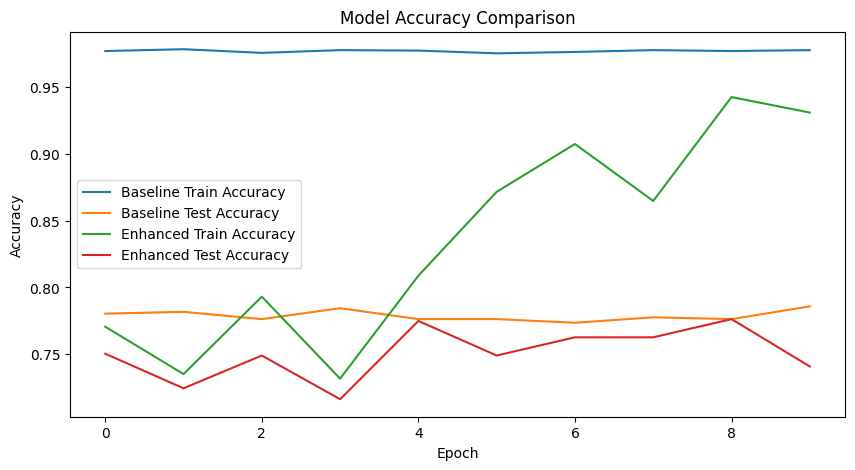

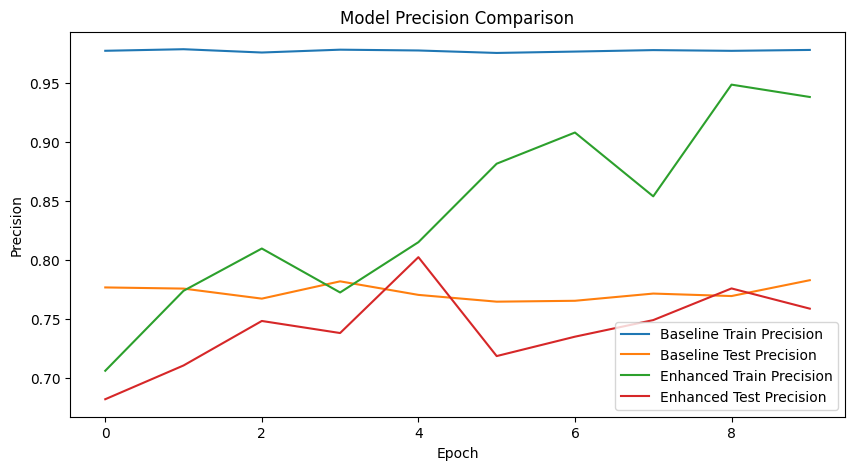

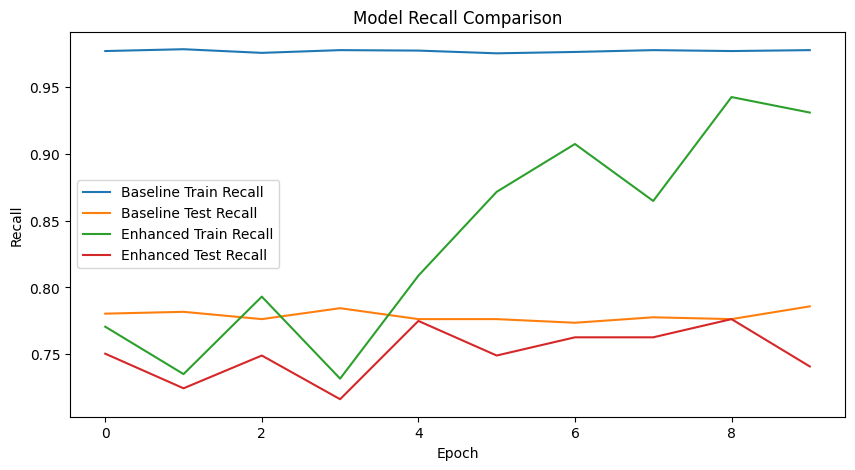

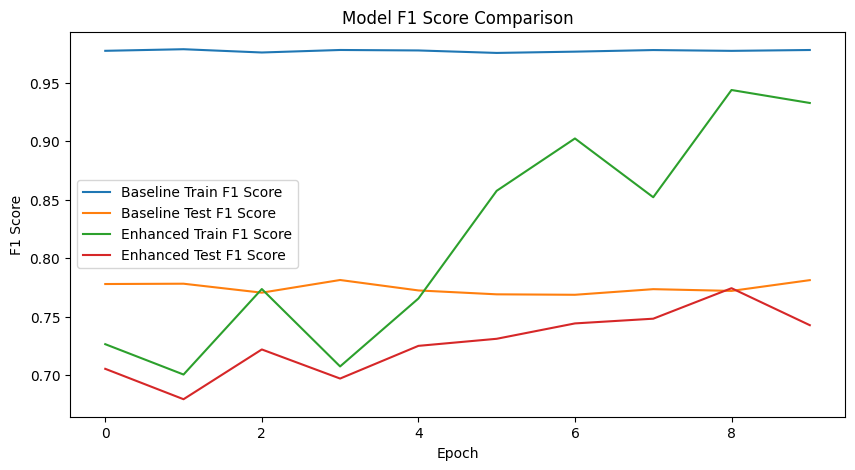

In [ ]:
# Baseline Model Metrics
baseline_train_acc, baseline_train_prec, baseline_train_rec, baseline_train_f1 = zip(*baseline_train_metrics)
baseline_test_acc, baseline_test_prec, baseline_test_rec, baseline_test_f1 = zip(*baseline_test_metrics)

# Enhanced Model Metrics
enhanced_train_acc, enhanced_train_prec, enhanced_train_rec, enhanced_train_f1 = zip(*enhanced_train_metrics)
enhanced_test_acc, enhanced_test_prec, enhanced_test_rec, enhanced_test_f1 = zip(*enhanced_test_metrics)

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(baseline_train_acc, label='Baseline Train Accuracy')
plt.plot(baseline_test_acc, label='Baseline Test Accuracy')
plt.plot(enhanced_train_acc, label='Enhanced Train Accuracy')
plt.plot(enhanced_test_acc, label='Enhanced Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')

# Precision Plot
plt.figure(figsize=(10, 5))
plt.plot(baseline_train_prec, label='Baseline Train Precision')
plt.plot(baseline_test_prec, label='Baseline Test Precision')
plt.plot(enhanced_train_prec, label='Enhanced Train Precision')
plt.plot(enhanced_test_prec, label='Enhanced Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Model Precision Comparison')

# Recall Plot
plt.figure(figsize=(10, 5))
plt.plot(baseline_train_rec, label='Baseline Train Recall')
plt.plot(baseline_test_rec, label='Baseline Test Recall')
plt.plot(enhanced_train_rec, label='Enhanced Train Recall')
plt.plot(enhanced_test_rec, label='Enhanced Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Model Recall Comparison')

# F1 Score Plot
plt.figure(figsize=(10, 5))
plt.plot(baseline_train_f1, label='Baseline Train F1 Score')
plt.plot(baseline_test_f1, label='Baseline Test F1 Score')
plt.plot(enhanced_train_f1, label='Enhanced Train F1 Score')
plt.plot(enhanced_test_f1, label='Enhanced Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.title('Model F1 Score Comparison')

plt.show()
